In [1]:
# import numpy as np
# from matplotlib import pyplot as plt
# from mdtraj.utils import timing
# #from msmbuilder.example_datasets import load_doublewell
# #from msmbuilder.example_datasets import load_doublewell_Gauss
# #from msmbuilder.example_datasets import load_doublewell_Quart
# #from msmbuilder.cluster import NDGrid
# #from msmbuilder.msm import BayesianMarkovStateModel, MarkovStateModel
# #from msmbuilder.msm import implied_timescales

# import mdtraj as md

# import numpy as np
# import pyemma
# from pyemma.coordinates.api import kmeans, regspace, uniform_time
# from pyemma.msm.analysis import eigenvalues, eigenvectors
# %matplotlib inline


import pyemma
pyemma.__version__

import os
%pylab inline
matplotlib.rcParams.update({'font.size': 12})

import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import msmbuilder
from msmbuilder.msm.ratematrix import ContinuousTimeMSM
import scipy
from msmtools.analysis.dense.decomposition import eigenvectors, eigenvalues
import operator

Populating the interactive namespace from numpy and matplotlib


/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# load the bin data
base_dir = ''
AA_dir = ''
dtraj_dir = ''
bin_dir = ''
#bin_ctrs = np.load(base_dir+'/'+AA_dir+'/'+bin_dir+'/'+'binctrs_50x50bins.dat.npy')
#print bin_ctrs

In [3]:
# load the traj data
#dtraj_AA = pyemma.msm.io.read_discrete_trajectory(base_dir+'/'+AA_dir+'/'+dtraj_dir+'/'+'dih_1-4_scatter.dat')
#dtraj_AA = np.squeeze(np.load('../traj/dtraj_CG_1traj_dih_1-4.npy'))
dtraj_AA = np.genfromtxt('../traj_intra.dat')
print dtraj_AA.T[:]

[[-157.754   -163.69    -170.555   ... -176.614   -178.638   -178.978  ]
 [   0.92374    0.93199    0.91754 ...    0.93922    0.93349    0.92126]]


In [4]:
#print dtraj_AA[:,1]

Nbins = 50

# ax0 = dih
min_ax0 = min(dtraj_AA[:,0])
max_ax0 = max(dtraj_AA[:,0])
print max_ax0
print min_ax0
centers_ax0 = np.linspace(min_ax0, max_ax0, num=Nbins)
print centers_ax0
# ax1 = 1-4
min_ax1 = min(dtraj_AA[:,1])
max_ax1 = max(dtraj_AA[:,1])
print max_ax1
print min_ax1
centers_ax1 = np.linspace(min_ax1, max_ax1, num=Nbins)
print centers_ax1

centers = [centers_ax0, centers_ax1]
print np.array(centers).shape

180.0
-180.0
[-180.         -172.65306122 -165.30612245 -157.95918367 -150.6122449
 -143.26530612 -135.91836735 -128.57142857 -121.2244898  -113.87755102
 -106.53061224  -99.18367347  -91.83673469  -84.48979592  -77.14285714
  -69.79591837  -62.44897959  -55.10204082  -47.75510204  -40.40816327
  -33.06122449  -25.71428571  -18.36734694  -11.02040816   -3.67346939
    3.67346939   11.02040816   18.36734694   25.71428571   33.06122449
   40.40816327   47.75510204   55.10204082   62.44897959   69.79591837
   77.14285714   84.48979592   91.83673469   99.18367347  106.53061224
  113.87755102  121.2244898   128.57142857  135.91836735  143.26530612
  150.6122449   157.95918367  165.30612245  172.65306122  180.        ]
1.14301
0.3962
[0.3962     0.41144102 0.42668204 0.44192306 0.45716408 0.4724051
 0.48764612 0.50288714 0.51812816 0.53336918 0.5486102  0.56385122
 0.57909224 0.59433327 0.60957429 0.62481531 0.64005633 0.65529735
 0.67053837 0.68577939 0.70102041 0.71626143 0.73150245 0.7467

In [5]:
bin_ctrs = centers[:]
print len(dtraj_AA[:,0])
print dtraj_AA[:,1]
print len(bin_ctrs[0])
print bin_ctrs[0][1] - bin_ctrs[0][0]
print np.floor(bin_ctrs[0][2] - bin_ctrs[0][1])

1000001
[0.92374 0.93199 0.91754 ... 0.93922 0.93349 0.92126]
50
7.3469387755102105
7.0


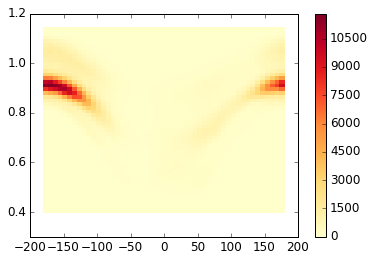

(51,)
(51,)
(50, 50)


In [6]:
# print the histogram of states
dist_AA, xEdges, yEdges = np.histogram2d(dtraj_AA[:,0], dtraj_AA[:,1], len(bin_ctrs[0]) )
#dist_AA,binEdges = np.histogram(dtraj_AA, len(bin_ctrs))
#intl = np.trapz(dist_AA,bin_ctrs)
#dist_AA = np.divide(dist_AA,intl)
#plt.plot(bin_ctrs,dist_AA,'--',linewidth=2.0,color='r')
plt.pcolor(xEdges,yEdges,dist_AA.T,cmap='YlOrRd')
plt.colorbar()
plt.show()

print xEdges.shape
print yEdges.shape
print dist_AA.shape

#plt.axis([-1.05, 1.05, 0.0, 1.2])
#plt.show()

In [7]:
ngridsx = len(bin_ctrs[0])
xmin = min(bin_ctrs[0])
dx = bin_ctrs[0][1] - bin_ctrs[0][0]
ngridsy = len(bin_ctrs[1])
ymin = min(bin_ctrs[1])
dy = bin_ctrs[1][1] - bin_ctrs[1][0]
dtraj_AA_labels = []
xgrid_traj = []
ygrid_traj = []
for i in range(0,len(dtraj_AA[:,0])):
    xgrid_traj.append( int(np.floor( (dtraj_AA[i,0] - xmin) / dx ) ) )
    ygrid_traj.append( int(np.floor( (dtraj_AA[i,1] - ymin) / dy ) ) )
    index = xgrid_traj[i] + ygrid_traj[i]*ngridsx
    dtraj_AA_labels.append(index)

In [8]:
# functions for transforming between bins and labels
def values_to_bins(x,y,xmin,ymin,dx,dy):
    xgrid = int( np.floor( (x - xmin) / dx ) ) 
    ygrid = int( np.floor( (y - ymin) / dy ) ) 
    return xgrid, ygrid

def bins_to_label(xgrid,ygrid,nx):
    label = xgrid + ygrid*nx 
    return label

def label_to_bins(label,nx):
    xgrid = label % nx
    ygrid = (label - xgrid) / nx
    return xgrid, ygrid

def bins_to_values(xgrid, ygrid, values):
    values_x = values[0][xgrid]
    values_y = values[1][ygrid]
    return values_x, values_y

In [9]:
tau = 3
Cmat_AA = pyemma.msm.estimation.count_matrix(dtraj_AA_labels, tau, sliding=False, sparse_return=False, nstates=None)
print pyemma.msm.estimation.is_connected(Cmat_AA, directed=True)
lcc_AA = pyemma.msm.estimation.largest_connected_set(Cmat_AA, directed=True)
Cmat_AA_cc = pyemma.msm.estimation.largest_connected_submatrix(Cmat_AA, directed=True, lcc=lcc_AA)
print lcc_AA

False
[  24   29   73 ... 2446 2447 2448]


In [10]:
#bin_ctrs_AA_cc = [bin_ctrs[i] for i in lcc_AA]
#bin_ctrs_AA_cc = np.array(bin_ctrs_AA_cc)
#print bin_ctrs
#print bin_ctrs_AA_cc

lcc_trim_AA = lcc_AA[:]
minsamp = np.sum(Cmat_AA_cc) / (100.0*lcc_AA.size)
nrem = 0
for i in range(0,lcc_AA.size):
    shift = i - nrem
    if ( np.sum(Cmat_AA_cc[shift]) < minsamp ): # trim from matrix and bins
        Cmat_AA_cc = np.delete(Cmat_AA_cc, (shift), axis=0)
        Cmat_AA_cc = np.delete(Cmat_AA_cc, (shift), axis=1)
        lcc_trim_AA = np.delete(lcc_trim_AA, (shift))
        nrem += 1
        
xgrids_trim, ygrids_trim = label_to_bins(lcc_trim_AA,ngridsx)
bin_ctrs_x_trim, bin_ctrs_y_trim = bins_to_values(xgrids_trim, ygrids_trim, bin_ctrs)
#plt.pcolor(lcc_trim_AA,lcc_trim_AA,Cmat_AA_cc,cmap='Blues')
#plt.colorbar()
#plt.show()

#print xgrids_trim
#print ygrids_trim
#print bin_ctrs_x_trim
#print bin_ctrs_y_trim

In [11]:
lcc_AA_tmp = pyemma.msm.estimation.largest_connected_set(Cmat_AA_cc, directed=True)
Cmat_AA_cc = pyemma.msm.estimation.largest_connected_submatrix(Cmat_AA_cc, directed=True, lcc=lcc_AA_tmp)
lcc_trim_AA = lcc_trim_AA[lcc_AA_tmp]

xgrids_trim, ygrids_trim = label_to_bins(lcc_trim_AA,ngridsx)
bin_ctrs_x_trim, bin_ctrs_y_trim = bins_to_values(xgrids_trim, ygrids_trim, bin_ctrs)

In [12]:
T_AA, pi_AA = pyemma.msm.estimation.transition_matrix(Cmat_AA_cc, reversible=True, mu=None, return_statdist=True)

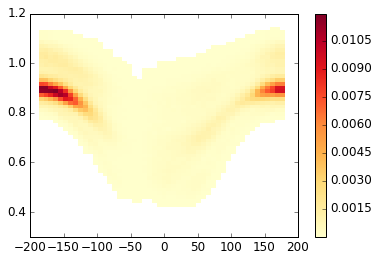

In [13]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=pi_AA,cmap='YlOrRd',marker='s',linewidth=0.0)
plt.colorbar()
plt.show()
#print bin_ctrs_x_trim
#print lcc_trim_AA.shape
#print bin_ctrs_y_trim.shape
#print pi_AA.shape

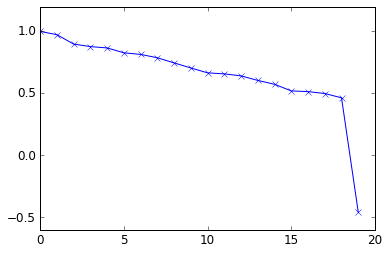

In [14]:
evals = eigenvalues(T_AA,k=20)
plt.plot(np.real(evals),marker='x')
#plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=pi_AA,cmap='YlOrRd',marker='s',linewidth=0.0)
#plt.colorbar()
#plt.show()


In [15]:
ts_est = pyemma.msm.analysis.dense.decomposition.timescales(T_AA)
print ts_est[1:5]
print len(dtraj_AA)

[36.8789366   9.25124454  7.63841474  6.986969  ]
1000001


In [16]:
ts_f_tau = []
tau = np.linspace(1,20,20,dtype=int)
for lag in tau:
    Cmat_AA = pyemma.msm.estimation.count_matrix(dtraj_AA_labels, lag, sliding=True, sparse_return=False, nstates=None)
    lcc_AA = pyemma.msm.estimation.largest_connected_set(Cmat_AA, directed=True)
    Cmat_AA_cc = pyemma.msm.estimation.largest_connected_submatrix(Cmat_AA, directed=True, lcc=lcc_AA)
    lcc_trim_AA = lcc_AA[:]
    minsamp = np.sum(Cmat_AA_cc) / (100.0*lcc_AA.size)
    nrem = 0
    for i in range(0,lcc_AA.size):
        shift = i - nrem
        if ( np.sum(Cmat_AA_cc[shift]) < minsamp ): # trim from matrix and bins
            Cmat_AA_cc = np.delete(Cmat_AA_cc, (shift), axis=0)
            Cmat_AA_cc = np.delete(Cmat_AA_cc, (shift), axis=1)
            lcc_trim_AA = np.delete(lcc_trim_AA, (shift))
            nrem += 1
    lcc_AA_tmp = pyemma.msm.estimation.largest_connected_set(Cmat_AA_cc, directed=True)
    Cmat_AA_cc = pyemma.msm.estimation.largest_connected_submatrix(Cmat_AA_cc, directed=True, lcc=lcc_AA_tmp)
    lcc_trim_AA = lcc_trim_AA[lcc_AA_tmp]
    T_AA, pi_AA = pyemma.msm.estimation.transition_matrix(Cmat_AA_cc, reversible=True, mu=None, return_statdist=True)
    ts_est = pyemma.msm.analysis.dense.decomposition.timescales(T_AA)
    ts_f_tau.append(ts_est[1:5])
ts_f_tau = np.array(ts_f_tau)

In [17]:
print ts_f_tau[0,:]
print ts_f_tau[:,0]
print ts_f_tau[:,:]

[260.4724795   66.65646561  50.22253107  38.71724962]
[260.4724795   76.41305582  36.72989607  22.18366053  15.17552264
  11.24052443   8.79888722   7.18297712   6.049653     5.22184652
   4.60294305   4.13343311   3.77051373   3.48767289   3.26718015
   3.09279408   2.94993103   2.82719377   2.72187436   2.62553826]
[[260.4724795   66.65646561  50.22253107  38.71724962]
 [ 76.41305582  19.29157526  15.28085332  13.48951846]
 [ 36.72989607   9.19055026   7.61224279   6.94807298]
 [ 22.18366053   5.76347775   5.12987499   4.57501105]
 [ 15.17552264   4.2977828    3.77176563   3.25843911]
 [ 11.24052443   3.4915941    2.96844992   2.46599769]
 [  8.79888722   3.04095935   2.51920238   2.05000076]
 [  7.18297712   2.82784901   2.24379298   1.91103381]
 [  6.049653     2.6431052    2.03702626   1.8144627 ]
 [  5.22184652   2.44858313   1.87345355   1.63605584]
 [  4.60294305   2.33044596   1.76281687   1.51808356]
 [  4.13343311   2.27880842   1.68518668   1.4561929 ]
 [  3.77051373   2.21

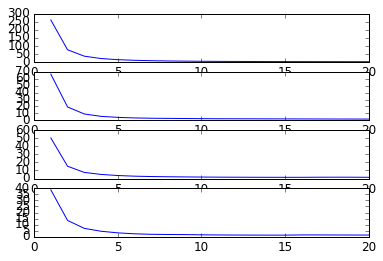

In [18]:
fig = plt.figure(1)
plt.subplot(4,1,1)
plt.plot(tau,ts_f_tau[:,0])
plt.subplot(4,1,2)
plt.plot(tau,ts_f_tau[:,1])
plt.subplot(4,1,3)
plt.plot(tau,ts_f_tau[:,2])
plt.subplot(4,1,4)
plt.plot(tau,ts_f_tau[:,3])

In [53]:
tau = np.linspace(1,50,20,dtype=int)
its_full = msm.timescales_msm(dtraj_AA_labels, lags=tau, nits=6)

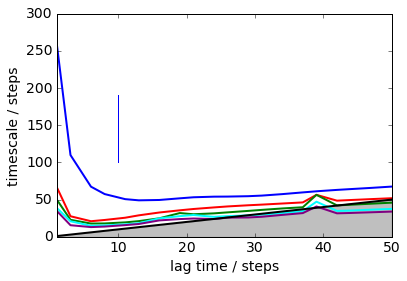

In [54]:
matplotlib.rcParams.update({'font.size': 14})
mplt.plot_implied_timescales(its_full, ylog=False, units='steps', linewidth=2)
plt.plot(10.*np.ones(10),np.arange(10)*10+100)
#xlim(0, 10); ylim(0, 100);

In [55]:
tau = 10
Cmat_AA = pyemma.msm.estimation.count_matrix(dtraj_AA_labels, tau, sliding=True, sparse_return=False, nstates=None)
print pyemma.msm.estimation.is_connected(Cmat_AA, directed=True)
lcc_AA = pyemma.msm.estimation.largest_connected_set(Cmat_AA, directed=True)
Cmat_AA_cc = pyemma.msm.estimation.largest_connected_submatrix(Cmat_AA, directed=True, lcc=lcc_AA)

False


In [56]:
#bin_ctrs_AA_cc = [bin_ctrs[i] for i in lcc_AA]
#bin_ctrs_AA_cc = np.array(bin_ctrs_AA_cc)
#print bin_ctrs
#print bin_ctrs_AA_cc

lcc_trim_AA = lcc_AA[:]
minsamp = np.sum(Cmat_AA_cc) / (100.0*lcc_AA.size)
nrem = 0
for i in range(0,lcc_AA.size):
    shift = i - nrem
    if ( np.sum(Cmat_AA_cc[shift]) < minsamp ): # trim from matrix and bins
        Cmat_AA_cc = np.delete(Cmat_AA_cc, (shift), axis=0)
        Cmat_AA_cc = np.delete(Cmat_AA_cc, (shift), axis=1)
        lcc_trim_AA = np.delete(lcc_trim_AA, (shift))
        nrem += 1
        
lcc_AA_tmp = pyemma.msm.estimation.largest_connected_set(Cmat_AA_cc, directed=True)
Cmat_AA_cc = pyemma.msm.estimation.largest_connected_submatrix(Cmat_AA_cc, directed=True, lcc=lcc_AA_tmp)
lcc_trim_AA = lcc_trim_AA[lcc_AA_tmp]

xgrids_trim, ygrids_trim = label_to_bins(lcc_trim_AA,ngridsx)
bin_ctrs_x_trim, bin_ctrs_y_trim = bins_to_values(xgrids_trim, ygrids_trim, bin_ctrs)

In [57]:
T_AA, pi_AA = pyemma.msm.estimation.transition_matrix(Cmat_AA_cc, reversible=True, mu=None, return_statdist=True)

In [58]:
# save the model
np.save('T',T_AA)
np.save('mu',pi_AA)
np.save('tau',tau)
np.save('grids_trim',np.array([xgrids_trim,ygrids_trim]))
np.save('bin_ctrs_trim',np.array([bin_ctrs_x_trim,bin_ctrs_y_trim]))
np.save('lcc_trim',lcc_trim_AA)

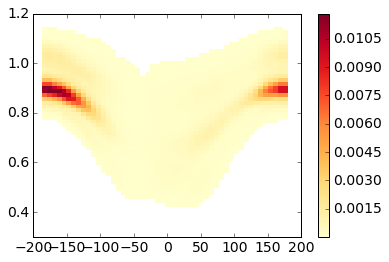

In [59]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=pi_AA,cmap='YlOrRd',marker='s',linewidth=0.0)
plt.colorbar()
plt.show()

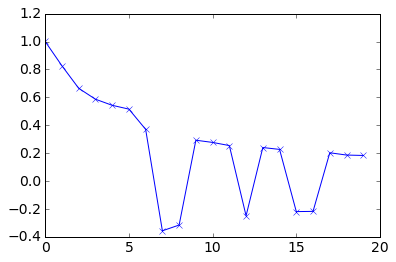

In [60]:
evals = eigenvalues(T_AA,k=20)
plt.plot(np.real(evals),marker='x')

In [61]:
evecs = eigenvectors(T_AA,k=20)

In [62]:
#print evecs[:,1]

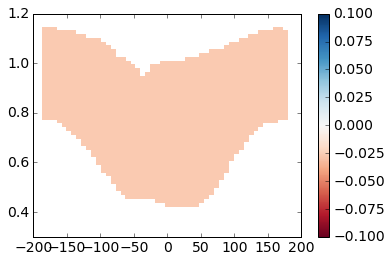

In [63]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=evecs[:,0],cmap='RdBu',marker='s',linewidth=0.0,vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.show()

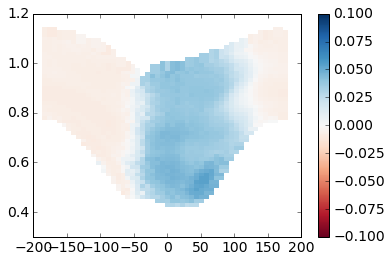

In [64]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=evecs[:,1],cmap='RdBu',marker='s',linewidth=0.0,vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.show()

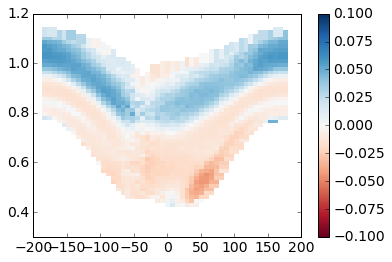

In [65]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=evecs[:,2],cmap='RdBu',marker='s',linewidth=0.0,vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.show()

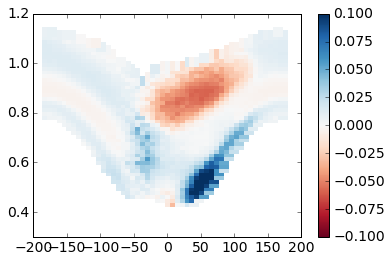

In [66]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=evecs[:,3],cmap='RdBu',marker='s',linewidth=0.0,vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.show()

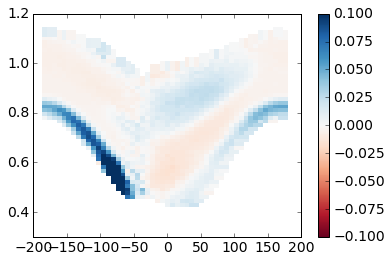

In [67]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=evecs[:,4],cmap='RdBu',marker='s',linewidth=0.0,vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.show()

In [68]:
from pyemma.msm import PCCA

In [69]:
pcca=PCCA(T_AA, 4)

In [70]:
membership_crisp=np.where(pcca.memberships>0.5)

In [71]:
#print membership_crisp[0]
membership = pcca.memberships

In [72]:
#print list(set(t) - set(s))  bin_ctrs_x_trim
#print bin_ctrs_y_trim
centers = [np.sort(list(set(bin_ctrs_x_trim))),np.sort(list(set(bin_ctrs_y_trim)))]
print centers[0]
print centers[1]

[-180.         -172.65306122 -165.30612245 -157.95918367 -150.6122449
 -143.26530612 -135.91836735 -128.57142857 -121.2244898  -113.87755102
 -106.53061224  -99.18367347  -91.83673469  -84.48979592  -77.14285714
  -69.79591837  -62.44897959  -55.10204082  -47.75510204  -40.40816327
  -33.06122449  -25.71428571  -18.36734694  -11.02040816   -3.67346939
    3.67346939   11.02040816   18.36734694   25.71428571   33.06122449
   40.40816327   47.75510204   55.10204082   62.44897959   69.79591837
   77.14285714   84.48979592   91.83673469   99.18367347  106.53061224
  113.87755102  121.2244898   128.57142857  135.91836735  143.26530612
  150.6122449   157.95918367  165.30612245  172.65306122]
[0.44192306 0.45716408 0.4724051  0.48764612 0.50288714 0.51812816
 0.53336918 0.5486102  0.56385122 0.57909224 0.59433327 0.60957429
 0.62481531 0.64005633 0.65529735 0.67053837 0.68577939 0.70102041
 0.71626143 0.73150245 0.74674347 0.76198449 0.77722551 0.79246653
 0.80770755 0.82294857 0.83818959 0.

In [73]:
print centers[0].size
print centers[1].size
print T_AA.shape
print bin_ctrs_x_trim.size
print membership[:,0]
#pi_AA_M = np.reshape(pi_AA, (centers[0].size,centers[1].size))

49
46
(1461, 1461)
1461
[0.12005964 0.05649534 0.14348956 ... 0.01253298 0.01102555 0.01276613]


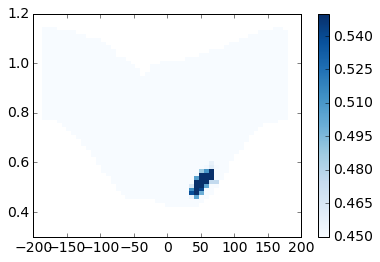

In [74]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=membership[:,0],cmap='Blues',marker='s',linewidth=0.0,vmin=0.5,vmax=0.5)
plt.colorbar()
plt.show()

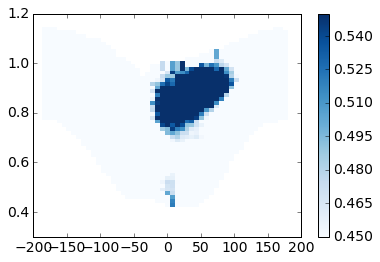

In [75]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=membership[:,1],cmap='Blues',marker='s',linewidth=0.0,vmin=0.5,vmax=0.5)
plt.colorbar()
plt.show()

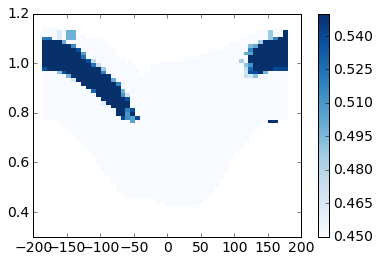

In [76]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=membership[:,2],cmap='Blues',marker='s',linewidth=0.0,vmin=0.5,vmax=0.5)
plt.colorbar()
plt.show()

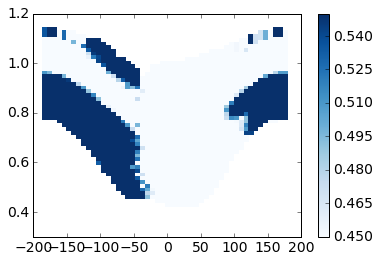

In [77]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=membership[:,3],cmap='Blues',marker='s',linewidth=0.0,vmin=0.5,vmax=0.5)
plt.colorbar()
plt.show()

In [78]:
# define the metastable states by label
E2 = np.where(membership[:,0]>0.5)
E1 = np.where(membership[:,1]>0.5)
H = np.where(membership[:,2]>0.5)
I = np.where(membership[:,3]>0.5)

In [79]:
# make sure there is no overlap
check = [val for val in E2[0] if val in I[0]]
print check 
check = [val for val in E2[0] if val in E1[0]]
print check 
check = [val for val in E2[0] if val in H[0]]
print check 

[]
[]
[]


In [80]:
# get the grids for each set
xgrids_I, ygrids_I = label_to_bins(lcc_trim_AA[I[0]],ngridsx)
bin_ctrs_x_I, bin_ctrs_y_I = bins_to_values(xgrids_I, ygrids_I, bin_ctrs)

xgrids_E2, ygrids_E2 = label_to_bins(lcc_trim_AA[E2[0]],ngridsx)
bin_ctrs_x_E2, bin_ctrs_y_E2 = bins_to_values(xgrids_E2, ygrids_E2, bin_ctrs)

xgrids_H, ygrids_H = label_to_bins(lcc_trim_AA[H[0]],ngridsx)
bin_ctrs_x_H, bin_ctrs_y_H = bins_to_values(xgrids_H, ygrids_H, bin_ctrs)

xgrids_E1, ygrids_E1 = label_to_bins(lcc_trim_AA[E1[0]],ngridsx)
bin_ctrs_x_E1, bin_ctrs_y_E1 = bins_to_values(xgrids_E1, ygrids_E1, bin_ctrs)

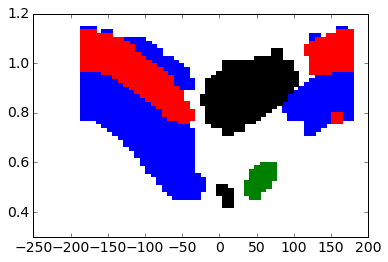

In [81]:
plt.scatter(bin_ctrs_x_I, bin_ctrs_y_I,color='b',s=150,marker='s',linewidth=0.0)
plt.scatter(bin_ctrs_x_E2, bin_ctrs_y_E2,color='g',s=150,marker='s',linewidth=0.0)
plt.scatter(bin_ctrs_x_H, bin_ctrs_y_H,color='r',s=150,marker='s',linewidth=0.0)
plt.scatter(bin_ctrs_x_E1, bin_ctrs_y_E1,color='k',s=150,marker='s',linewidth=0.0)
plt.show()

In [82]:
#from pyemma.msm.analysis import mfpt
from msmtools.analysis import mfpt

In [83]:
m_t_H_I = mfpt(T_AA,I[0],origin=H[0])
m_t_H_E1 = mfpt(T_AA,E1[0],origin=H[0])
m_t_H_E2 = mfpt(T_AA,E2[0],origin=H[0])

m_t_I_E1 = mfpt(T_AA,E1[0],origin=I[0])
m_t_I_E2 = mfpt(T_AA,E2[0],origin=I[0])
m_t_I_H = mfpt(T_AA,H[0],origin=I[0])

m_t_E1_E2 = mfpt(T_AA,E2[0],origin=E1[0])
m_t_E1_I = mfpt(T_AA,I[0],origin=E1[0])
m_t_E1_H = mfpt(T_AA,H[0],origin=E1[0])

m_t_E2_E1 = mfpt(T_AA,E1[0],origin=E2[0])
m_t_E2_I = mfpt(T_AA,I[0],origin=E2[0])
m_t_E2_H = mfpt(T_AA,H[0],origin=E2[0])

In [84]:
print m_t_H_I 
print m_t_H_E1 
print m_t_H_E2
print '\n'
print m_t_I_E1 
print m_t_I_E2 
print m_t_I_H 
print '\n'
print m_t_E1_E2 
print m_t_E1_I 
print m_t_E1_H 
print '\n'
print m_t_E2_E1 
print m_t_E2_I 
print m_t_E2_H 

3.8030373605024996
74.65093795275122
465.5797394324452


76.98349886665834
464.780791134098
18.996777067481823


444.20827857305943
7.021869490898364
20.14891032644887


56.513243087597985
7.513918694005247
24.069821532697194
